In [21]:
#!/usr/bin/env python3

import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys
# sys.path.insert(0, '/Users/aymericvie/Documents/GitHub/evology/evology/data')
# print(sys.path)

# Import the data
df = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/data/run_data.csv")
print(df)

      Unnamed: 0     Gen   Price      Mismatch  Dividends  RDividend  \
0              0     0.0  102.26   -170.287556   0.003894  -0.967076   
1              1     1.0  101.89  -2651.827975   0.003915   0.845448   
2              2     2.0  102.14   -436.788671   0.003933   0.745801   
3              3     3.0  102.50    746.159569   0.003950   0.688860   
4              4     4.0  102.83   6810.226993   0.004015   2.604248   
...          ...     ...     ...           ...        ...        ...   
4974        4974  4974.0   70.36  -1424.983991   0.002315  -1.569320   
4975        4975  4975.0   69.75  10933.554007   0.002321   0.413240   
4976        4976  4976.0   69.65   5479.766324   0.002329   0.512843   
4977        4977  4977.0   69.87  -4999.713504   0.002334   0.302917   
4978        4978  4978.0   70.11  -1495.139162   0.002339   0.339230   

            Volume  Rep        Pos+          Pos-  ...  Spoils     TimeA  \
0     7.811076e+05  0.0  50000000.0  0.000000e+00  ...     

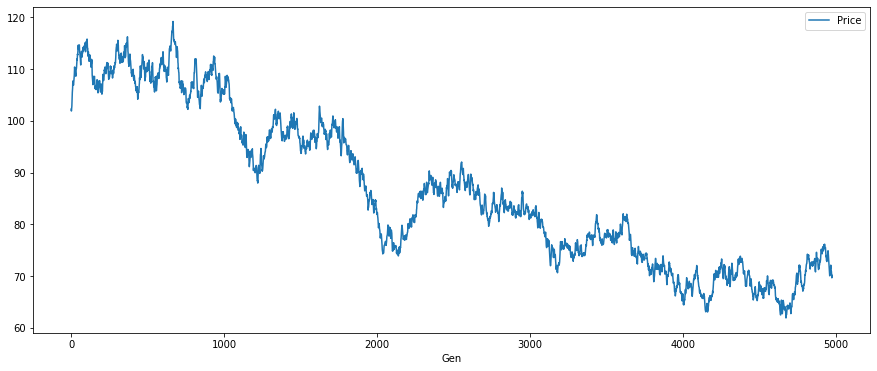

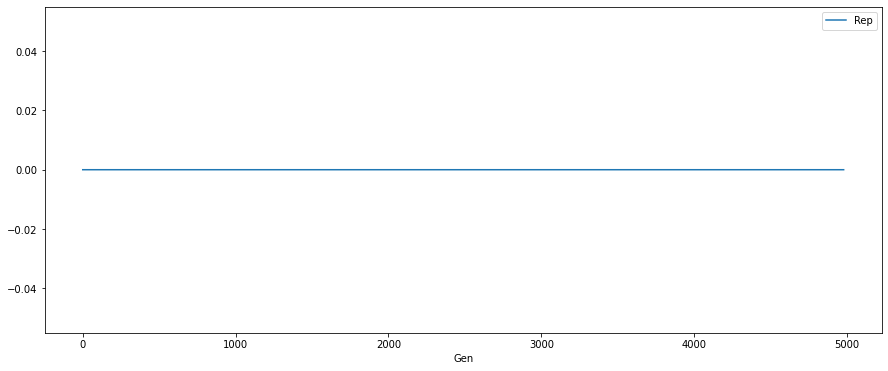

In [22]:

df.plot(x="Gen", y = ["Price"],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ['Rep'],
        kind="line", figsize=(15, 6))
plt.show()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


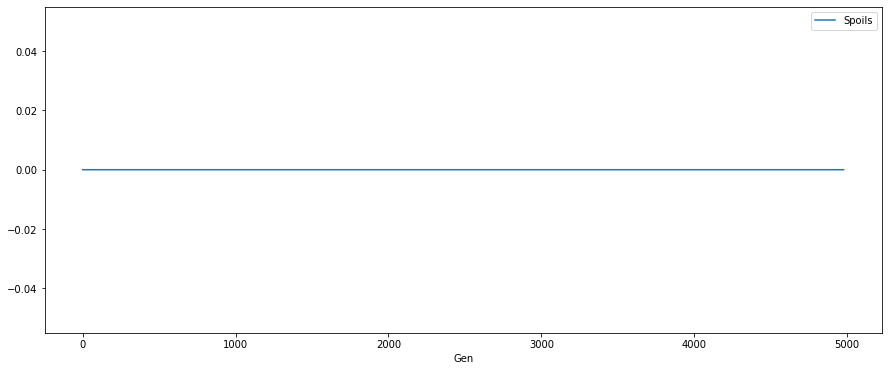

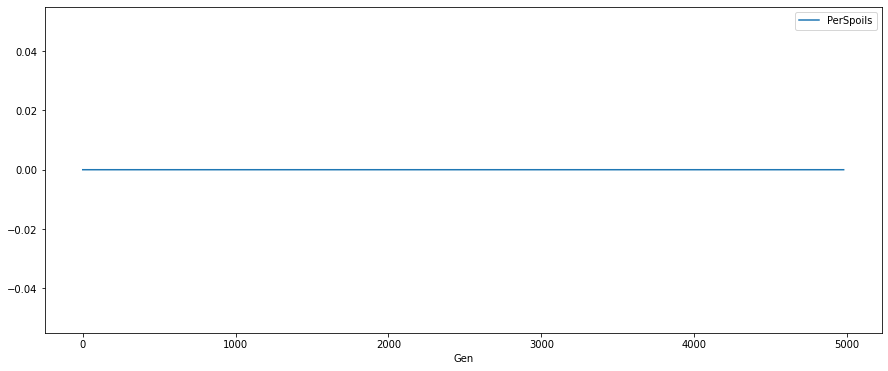

In [23]:

df['AbsSpoils'] = [abs(ele) for ele in df['Spoils']]
df['LogAbsSpoils'] = np.log(df['AbsSpoils'])

df.plot(x="Gen", y = ['Spoils'],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ['PerSpoils'],
        kind="line", figsize=(15, 6))
plt.show()

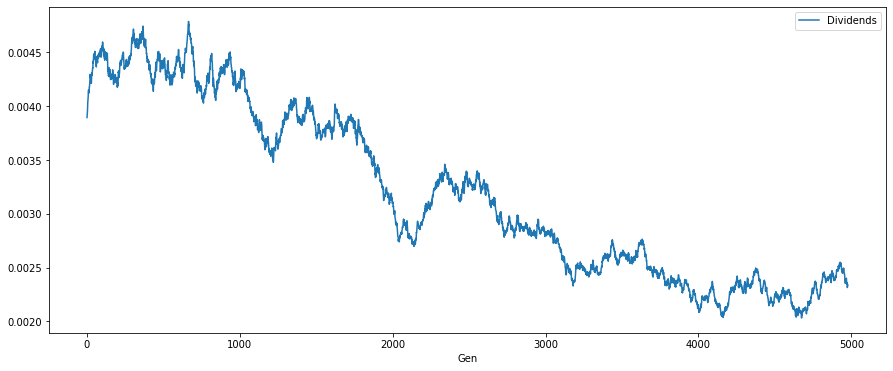

In [24]:
df.plot(x="Gen", y = ["Dividends"],
        kind="line", figsize=(15, 6))
plt.show()



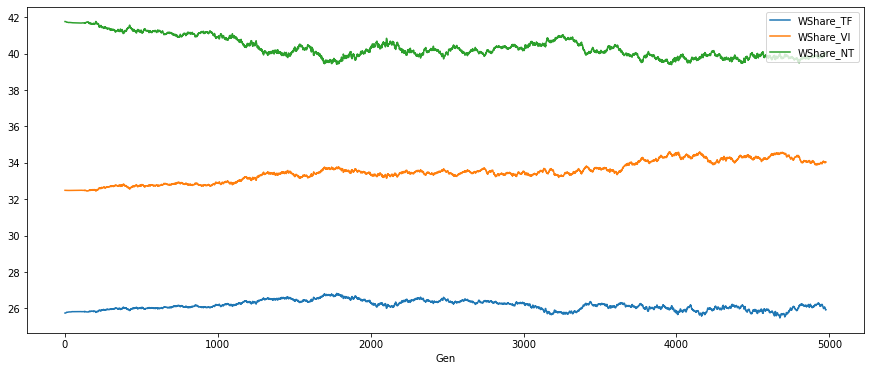

In [25]:
df.plot(x="Gen", y = ["WShare_TF", "WShare_VI", "WShare_NT"],
        kind="line", figsize=(15, 6))
plt.show()



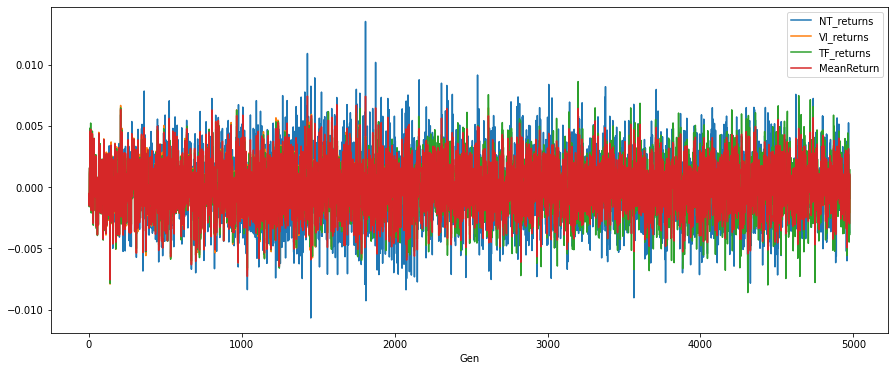

In [26]:
df.plot(x="Gen", y = ["NT_returns", "VI_returns", "TF_returns", 'MeanReturn'],
        kind="line", figsize=(15, 6))
plt.show()

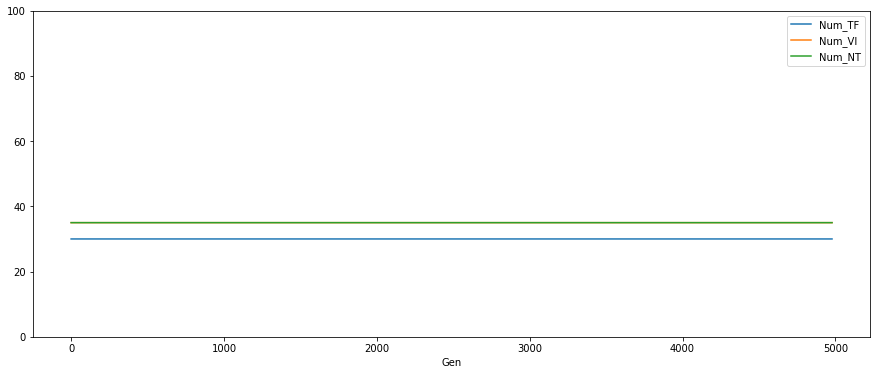

In [27]:
# Basic plots

df.plot(x="Gen", y = ["Num_TF", "Num_VI", "Num_NT"],
        kind="line", figsize=(15, 6), ylim=(0,100))
plt.show()

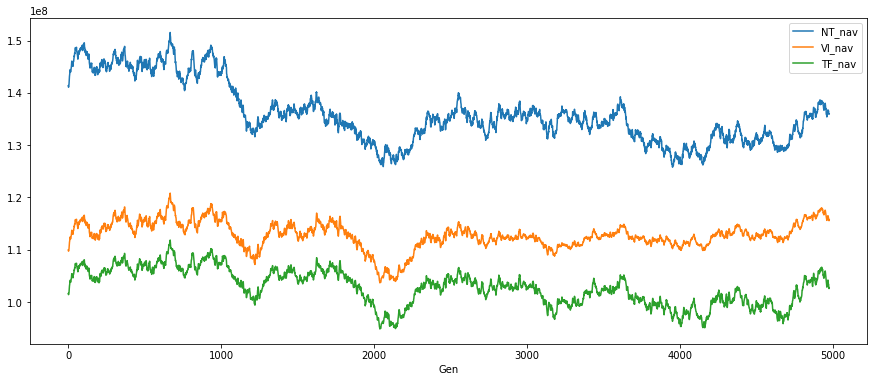

In [28]:
''' NAV '''
df.plot(x="Gen", y = ["NT_nav", "VI_nav", "TF_nav"],
        kind="line", figsize=(15, 6))
plt.show()


2.9606180312417315e-05


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


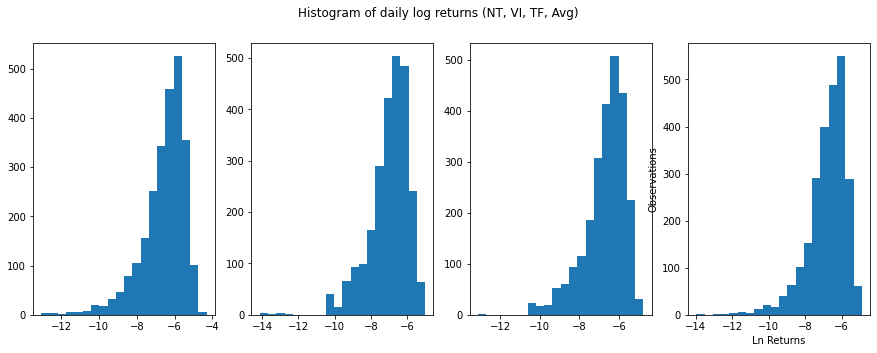

In [29]:
''' Histogram of the daily strategy returns '''

print(np.mean(df['MeanReturn'])) # Daily







fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (15, 5))
fig.suptitle('Histogram of daily log returns (NT, VI, TF, Avg)')
ax1.hist(np.log(df['NT_returns']), bins = 20)
ax2.hist(np.log(df['VI_returns']), bins = 20)
ax3.hist(np.log(df['TF_returns']), bins = 20)
ax4.hist(np.log(df['MeanReturn']), bins = 20)
ax4.set_ylabel('Observations')
ax4.set_xlabel('Ln Returns')
plt.show()

# TODO: add monthly returns





1.0000558122857015


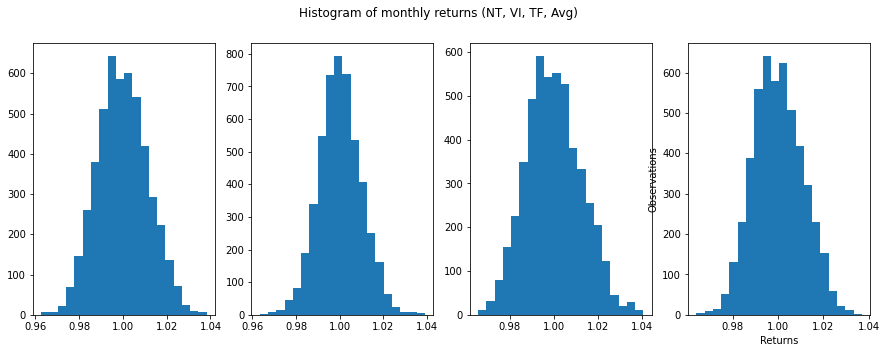

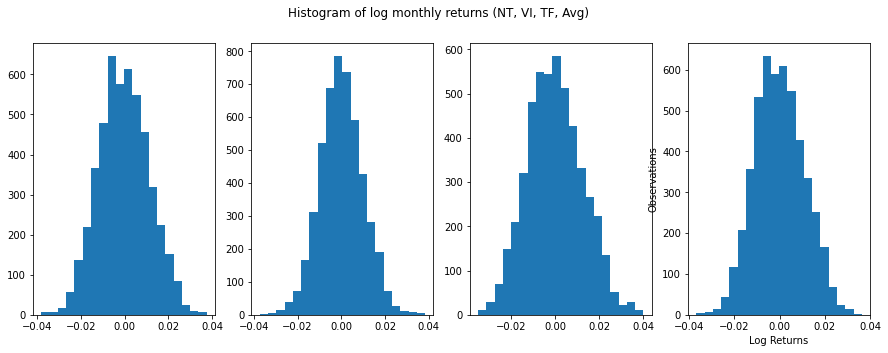

In [30]:
''' Monthly strategy returns '''


NT_monthly_returns = [np.nan] * 21
NT_daily_wealth = df['NT_nav'].to_numpy()
i = 21
while i < len(NT_daily_wealth):
    try:
        NT_monthly_returns.append(NT_daily_wealth[i] / NT_daily_wealth[i-21])
    except:
        NT_monthly_returns.append(0)
    i += 1

VI_monthly_returns = [np.nan] * 21
VI_daily_wealth = df['VI_nav'].to_numpy()
i = 21
while i < len(VI_daily_wealth):
    try:
        VI_monthly_returns.append(VI_daily_wealth[i] / VI_daily_wealth[i-21])
    except:
        VI_monthly_returns.append(0)
    i += 1

TF_monthly_returns = [np.nan] * 21
TF_daily_wealth = df['TF_nav'].to_numpy()
i = 21
while i < len(TF_daily_wealth):
    try:
        TF_monthly_returns.append(TF_daily_wealth[i] / TF_daily_wealth[i-21])
    except: 
        TF_monthly_returns.append(0)
    i += 1


AvgMonthlyReturn = []
for i in range(len(VI_monthly_returns)):
    AvgMonthlyReturn.append((TF_monthly_returns[i] + NT_monthly_returns[i] + VI_monthly_returns[i]) / 3)

df['MonthlyReturn'] = AvgMonthlyReturn
df['NT_MonthlyReturn'] = NT_monthly_returns
df['VI_MonthlyReturn'] = VI_monthly_returns
df['TF_MonthlyReturn'] = TF_monthly_returns

print(np.mean(df['MonthlyReturn'])) # Daily


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (15, 5))
fig.suptitle('Histogram of monthly returns (NT, VI, TF, Avg)')
ax1.hist(df['NT_MonthlyReturn'], bins = 20)
ax2.hist(df['VI_MonthlyReturn'], bins = 20)
ax3.hist(df['TF_MonthlyReturn'], bins = 20)
ax4.hist(df['MonthlyReturn'], bins = 20)
ax4.set_ylabel('Observations')
ax4.set_xlabel('Returns')
plt.show()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (15, 5))
fig.suptitle('Histogram of log monthly returns (NT, VI, TF, Avg)')
ax1.hist(np.log(df['NT_MonthlyReturn']), bins = 20)
ax2.hist(np.log(df['VI_MonthlyReturn']), bins = 20)
ax3.hist(np.log(df['TF_MonthlyReturn']), bins = 20)
ax4.hist(np.log(df['MonthlyReturn']), bins = 20)
ax4.set_ylabel('Observations')
ax4.set_xlabel('Log Returns')
plt.show()

Bin